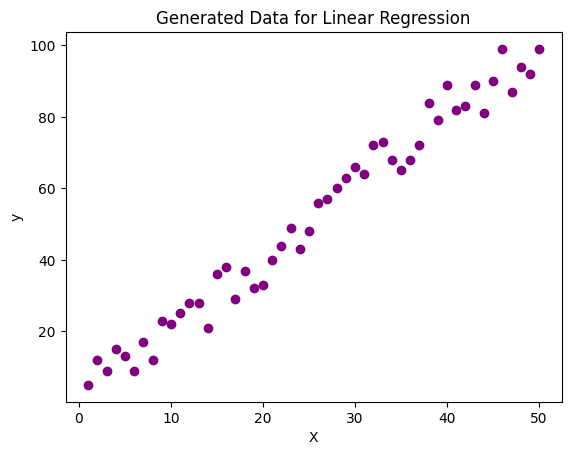

Initial Weight: 0.10597813
Initial Bias: 0.96379614



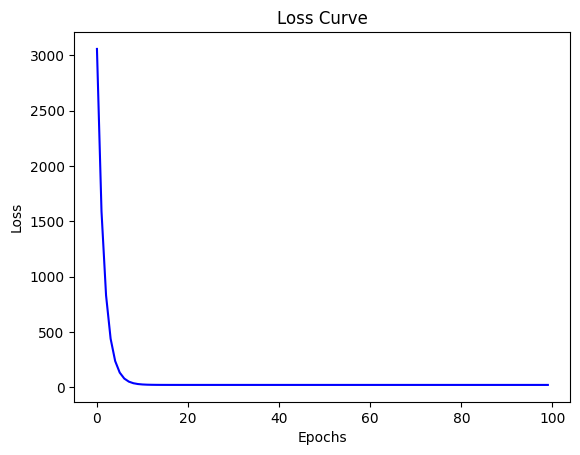

Final Weight: 1.98277164
Final Bias: 1.09101629



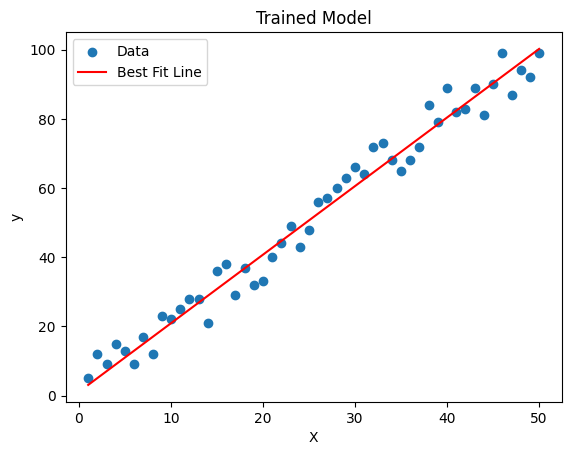

Prediction for x = 120: 239.02362061


In [4]:
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt

# Generate data: y = 2x + 1 + noise
t.manual_seed(71)
X = t.linspace(1, 50, 50).reshape(-1, 1)
noise = t.randint(-8, 9, (50, 1), dtype=t.float)
y = 2 * X + 1 + noise

# Visualize data
plt.scatter(X.numpy(), y.numpy(), color='purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

# Define linear model
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize model
t.manual_seed(59)
model = Model()

# Print initial weights
print(f"Initial Weight: {model.linear.weight.item():.8f}")
print(f"Initial Bias: {model.linear.bias.item():.8f}\n")


# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(), lr=0.001)

# Training loop
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot loss curve
plt.plot(range(100), losses, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Final weights
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print(f"Final Weight: {final_weight:.8f}")
print(f"Final Bias: {final_bias:.8f}\n")

# Plot best fit line
x_line = t.tensor([X.min(), X.max()])
y_line = final_weight * x_line + final_bias

plt.scatter(X.numpy(), y.numpy(), label='Data')
plt.plot(x_line.numpy(), y_line.numpy(), color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Trained Model')
plt.legend()
plt.show()

# Prediction
x_test = t.tensor([[120.0]])
y_test_pred = model(x_test).item()
print(f"Prediction for x = 120: {y_test_pred:.8f}")

